## 1. Preprocess

### load libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import joblib

### read the data

In [2]:
data_df = pd.read_csv('data/data.csv').set_index(['X1', 'X2', 'X3', 'M'])

### reshape the  data

In [3]:
# transfer TS00/TO00, TS01/TO01,...,TS14/TO14 to TS/TO
ts_to_array=data_df.values.reshape(1500000,2)
feature_array = data_df.reset_index()[['X1', 'X2', 'X3', 'M']].values
dup_feature_array =np.tile(feature_array,(15,1))
reshaped_df=pd.DataFrame(
    np.concatenate((dup_feature_array,ts_to_array), axis=1),
    columns=['X1', 'X2', 'X3', 'M','TS','TO']).dropna()

### convert the format

In [4]:
#convert X1, X2, X3, M to int/float; convert TS, TO to time
reshaped_df=reshaped_df.astype({'X1': 'float64','X2': 'float64','M': 'int64'})
reshaped_df['TO']=pd.to_datetime(reshaped_df['TO'], errors='coerce')
reshaped_df['TS']=pd.to_datetime(reshaped_df['TS'], errors='coerce')
#calculate the difference between  TO and TS in minutes
TO_TS_diff = (reshaped_df['TO']-reshaped_df['TS']).dt.components
TO_TS_diff_real_minutes =TO_TS_diff['hours']*60+TO_TS_diff['minutes']
reshaped_df['TS_TO_diff_minutes'] = TO_TS_diff_real_minutes
#convert TS,TO into minutes
reshaped_df['TO']=reshaped_df['TO'].dt.hour*60 +reshaped_df['TO'].dt.minute
reshaped_df['TS']=reshaped_df['TS'].dt.hour*60 +reshaped_df['TS'].dt.minute
reshaped_df = reshaped_df.dropna()
#One Hot Encoding
final_df=pd.get_dummies(reshaped_df).rename(columns={"X3_0.0": "X3_0", "X3_1.0": "X3_1","X3_2.0": "X3_2","X3_3.0": "X3_3",})

### Normalize the numerical features

In [5]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(final_df[['X1','X2']].values)
final_df['X1']=x_scaled[:,0]
final_df['X2']=x_scaled[:,1]

### Save the normalization scaler

In [6]:
joblib.dump(min_max_scaler, 'model/min_max_scaler.joblib') 

['model/min_max_scaler.joblib']

## 2. Save the final dataframe as CSV

In [7]:
final_df.to_csv('data/clean.csv', header=True)

## 3.Visualization

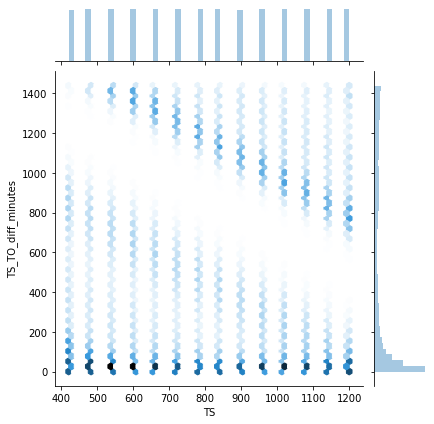

In [8]:
sns.jointplot(x=final_df["TS"], y=final_df["TS_TO_diff_minutes"], kind='hex')

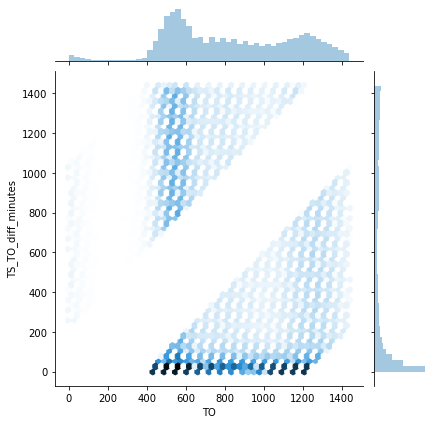

In [9]:
sns.jointplot(x=final_df["TO"], y=final_df["TS_TO_diff_minutes"], kind='hex')

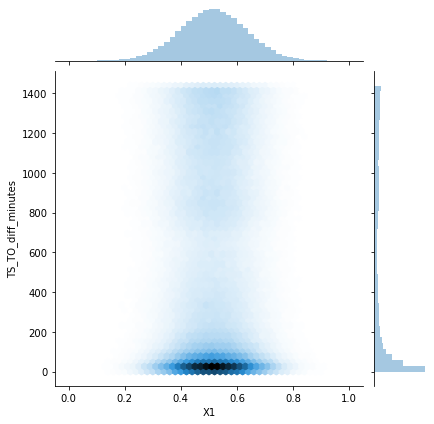

In [10]:
sns.jointplot(x=final_df["X1"], y=final_df["TS_TO_diff_minutes"], kind='hex')

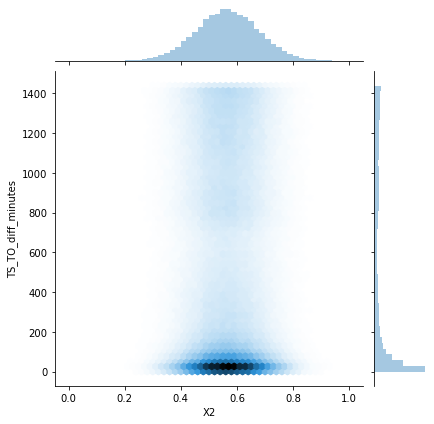

In [11]:
sns.jointplot(x=final_df["X2"], y=final_df["TS_TO_diff_minutes"], kind='hex')

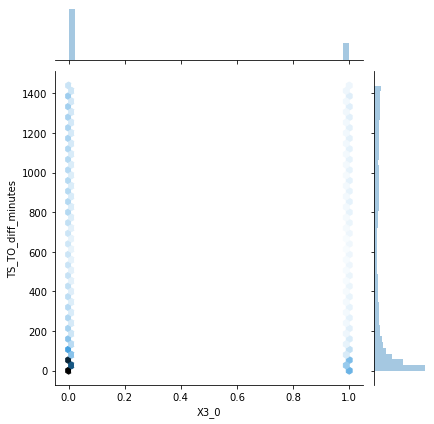

In [12]:
sns.jointplot(x=final_df["X3_0"], y=final_df["TS_TO_diff_minutes"], kind='hex')

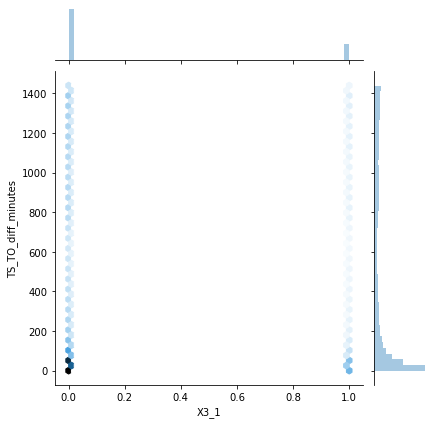

In [13]:
sns.jointplot(x=final_df["X3_1"], y=final_df["TS_TO_diff_minutes"], kind='hex')

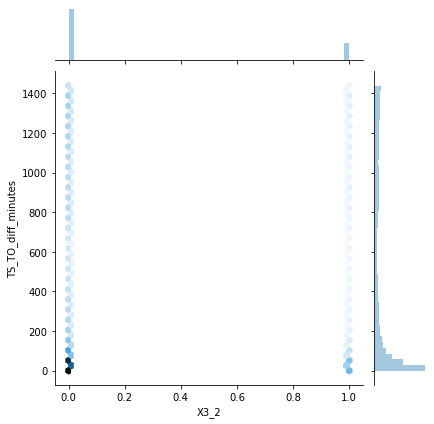

In [14]:
sns.jointplot(x=final_df["X3_2"], y=final_df["TS_TO_diff_minutes"], kind='hex')

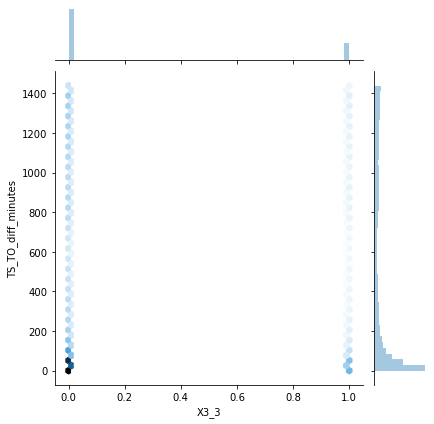

In [15]:
sns.jointplot(x=final_df["X3_3"], y=final_df["TS_TO_diff_minutes"], kind='hex')

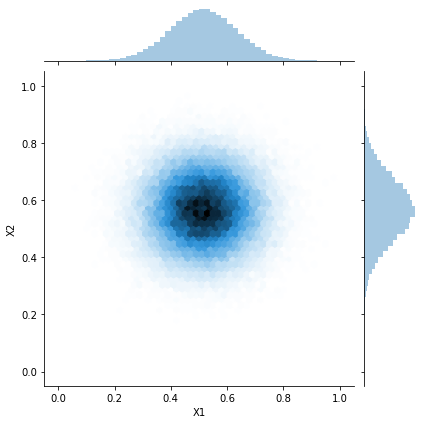

In [16]:
sns.jointplot(x=final_df["X1"], y=final_df["X2"], kind='hex')

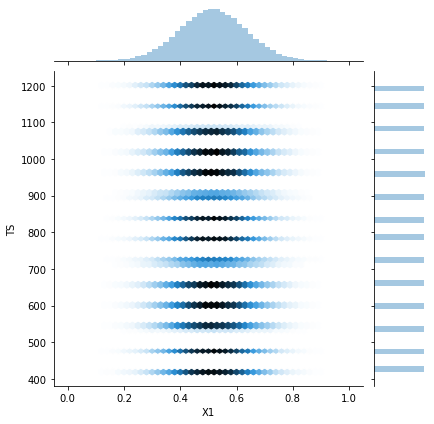

In [17]:
sns.jointplot(x=final_df["X1"], y=final_df["TS"], kind='hex')

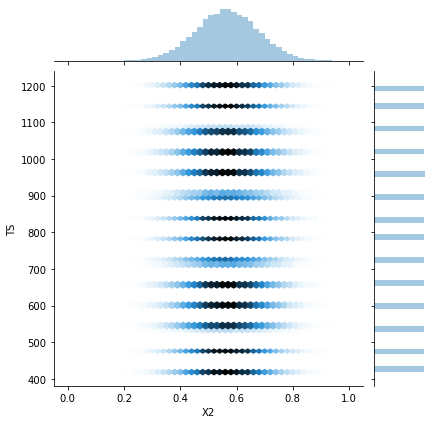

In [18]:
sns.jointplot(x=final_df["X2"], y=final_df["TS"], kind='hex')

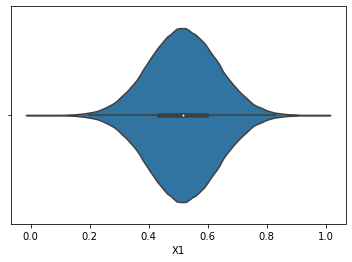

In [19]:
sns.violinplot(x=final_df["X1"])

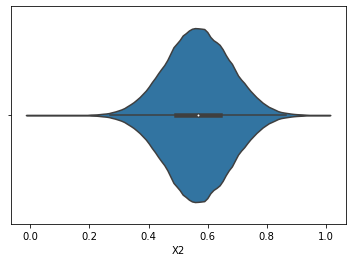

In [20]:
sns.violinplot(x=final_df["X2"])

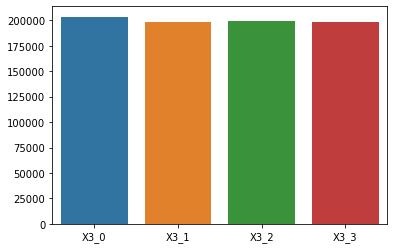

In [21]:
sns.barplot(x=final_df[["X3_0","X3_1","X3_2","X3_3"]].sum().index,y=final_df[["X3_0","X3_1","X3_2","X3_3"]].sum().values)

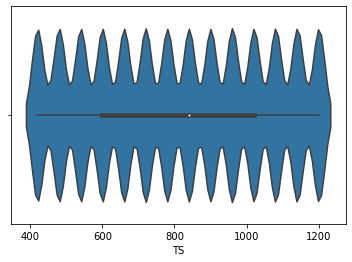

In [22]:
sns.violinplot(x=final_df["TS"])

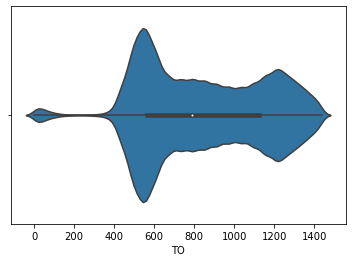

In [23]:
sns.violinplot(x=final_df["TO"])

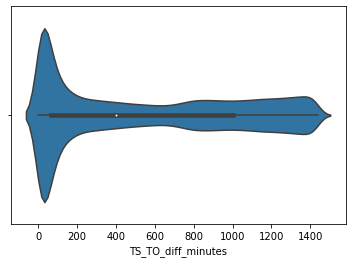

In [24]:
sns.violinplot(x=final_df["TS_TO_diff_minutes"])

## 4.Feature correlations

In [25]:
pearsoncorr=final_df.corr()

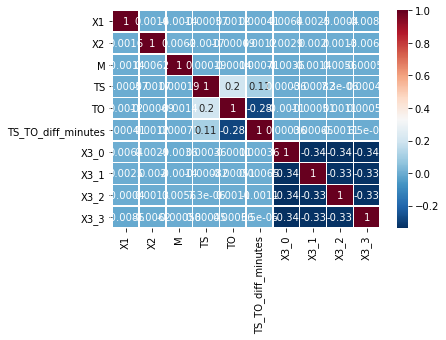

In [26]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [27]:
final_df["TS_TO_diff_minutes"].loc[final_df["TS_TO_diff_minutes"]<240].count()*1.0/final_df["TS_TO_diff_minutes"].count()

0.4207530308226465

## 5.Summary

1. Feature X1, X2 and X3 are quite euqually distributed.
2. People prefer to open the email ether in the morning or in the evening.
3. around 42% of people open the email in 4 hours after the sending time.
4. the features are independent to each other.